<a href="https://colab.research.google.com/github/JKD03/Heart-Disease-Predictor/blob/main/Heart_Disease_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Disease Predictor

<img src='https://miro.medium.com/max/844/1*6nE1MADqsFutGS-MZeYXig.jpeg' width=300px>


---

Jaskarandeep Singh        (102003486)

###Importing Required Libraries


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#train-test split for validatiion
from sklearn.model_selection import train_test_split
#importing metrics for classification
from sklearn.metrics import accuracy_score

###Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# making a dataframe from the downloaded dataset from kaggle (Heart Disease UCI Dataset)
df = pd.read_csv('/content/drive/MyDrive/heart_disease_data.csv')

# printing first 5 rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


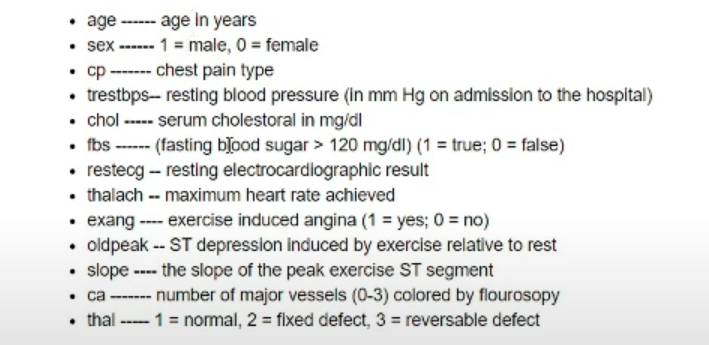

###Feature Engineering

In [ ]:
# printing last 5 rows of the dataset
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# number of rows and columns in the dataset
print(df.shape)
df.info()

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

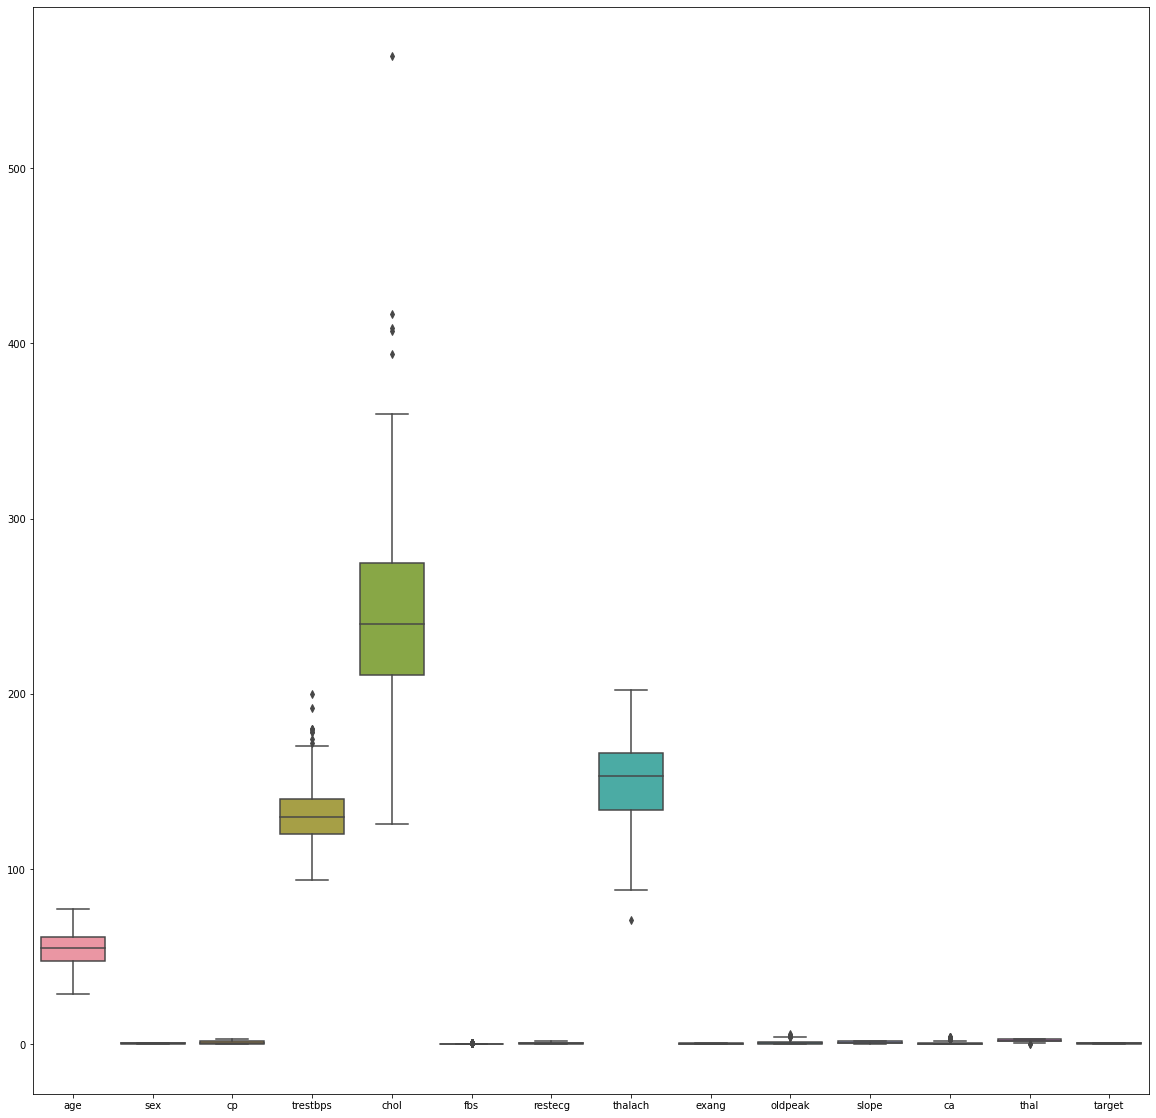

In [ ]:
#checking for outliers
plt.figure(figsize=(20,20))
ax = sns.boxplot(data = df)

In [ ]:
#removing outliers using z score
z = np.abs(stats.zscore(df))
print(z)

          age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.952197  0.681005  1.973123  0.763956  0.256334  2.394438  1.005832   
1    1.915313  0.681005  1.002577  0.092738  0.072199  0.417635  0.898962   
2    1.474158  1.468418  0.032031  0.092738  0.816773  0.417635  1.005832   
3    0.180175  0.681005  0.032031  0.663867  0.198357  0.417635  0.898962   
4    0.290464  1.468418  0.938515  0.663867  2.082050  0.417635  0.898962   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.290464  1.468418  0.938515  0.478391  0.101730  0.417635  0.898962   
299  1.033002  0.681005  1.973123  1.234996  0.342756  0.417635  0.898962   
300  1.503641  0.681005  0.938515  0.706843  1.029353  2.394438  0.898962   
301  0.290464  0.681005  0.938515  0.092738  2.227533  0.417635  0.898962   
302  0.290464  1.468418  0.032031  0.092738  0.198357  0.417635  1.005832   

      thalach     exang   oldpeak     slope        ca      thal    target  

In [ ]:
threshold = 3
print(np.where(z>3))
#values which are greater than the third deviation 
#the first array contains the list of row numbers and second array respective column numbers

(array([ 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
       251, 272, 281]), array([ 4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12]))


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [ ]:
df = df[(z<3).all(axis=1)]
df.shape

(287, 14)

In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(228, 14)

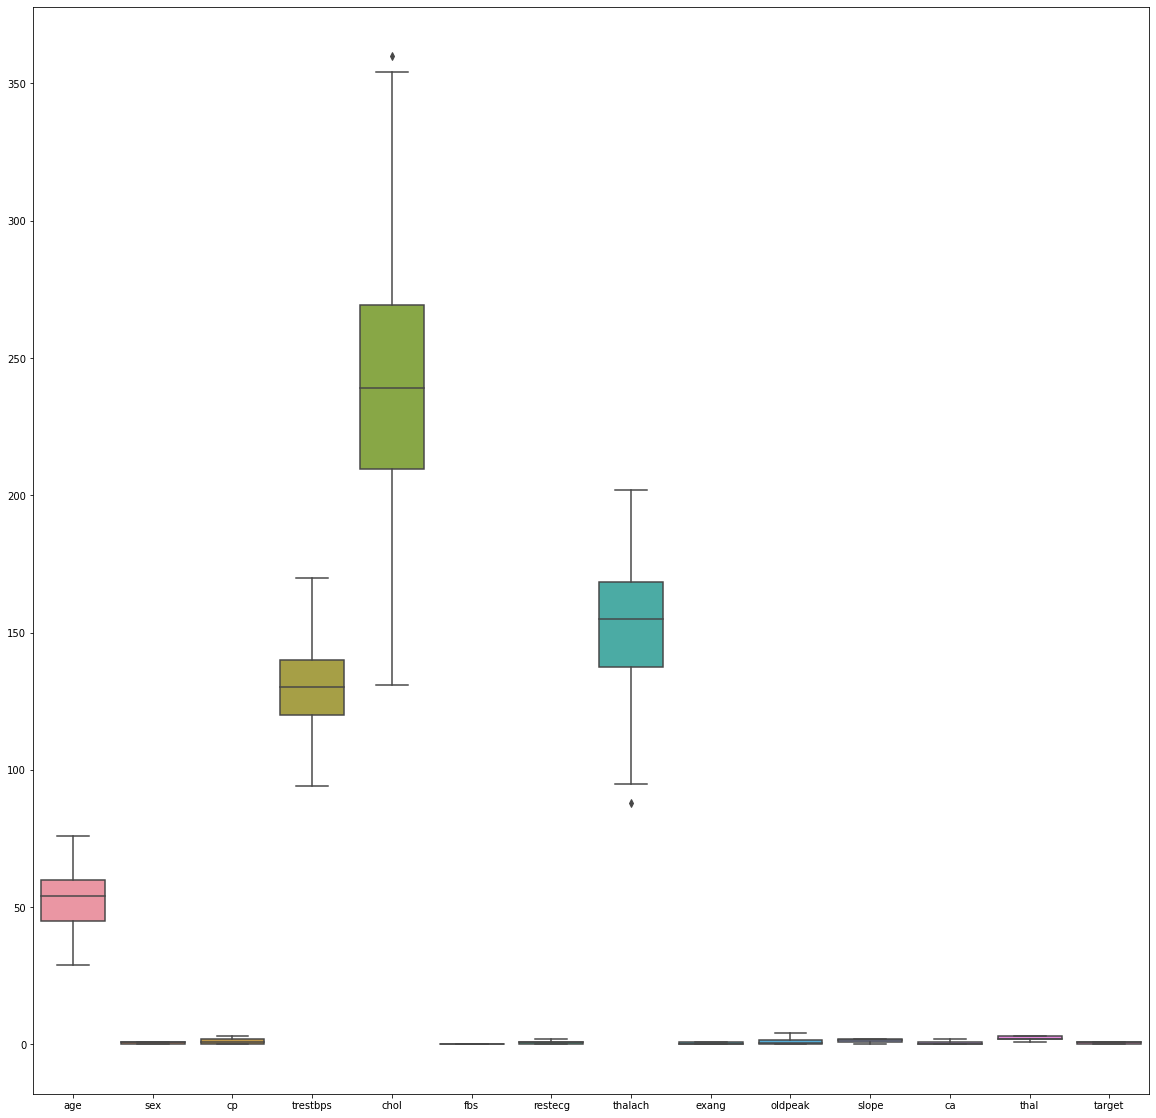

In [ ]:
#checking for outliers
plt.figure(figsize=(20,20))
ax = sns.boxplot(data = df)

### Feature Selection

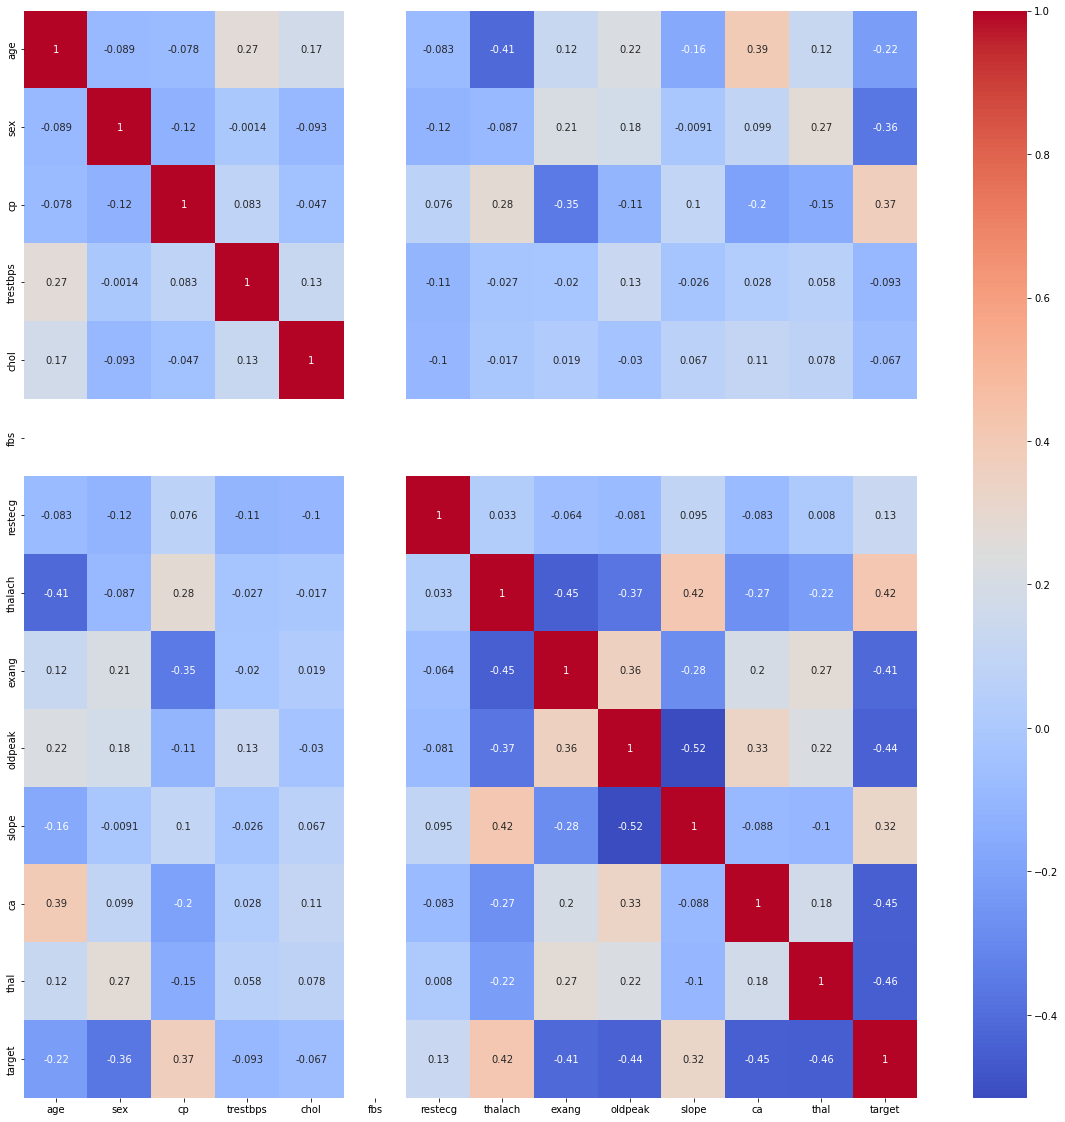

In [ ]:
#correlation diagram for feature selection 
plt.figure(figsize=(20,20))
d = sns.heatmap(df.corr(),cmap="coolwarm",annot= True)
#red is positive correlation
#blue is negative correlation

In [ ]:
# some statistical measures of the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.0,228.000000,228.000000,228.000000,228.000000,228.000000,228.00000,228.000000,228.000000
mean,53.333333,0.675439,0.942982,128.671053,242.372807,0.0,0.548246,151.070175,0.315789,0.946053,1.451754,0.47807,2.315789,0.578947
std,9.229016,0.469241,1.020190,15.349142,44.329827,0.0,0.516125,22.492963,0.465852,1.035422,0.587945,0.69893,0.560299,0.494814
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,45.000000,0.000000,0.000000,120.000000,209.750000,0.0,0.000000,137.500000,0.000000,0.000000,1.000000,0.00000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.0,1.000000,155.000000,0.000000,0.600000,1.500000,0.00000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.250000,0.0,1.000000,168.250000,1.000000,1.600000,2.000000,1.00000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.00000,3.000000,1.000000


###Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])# creating dummy variables
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] # we have taken these columns for scaling down
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [ ]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,thal_1,thal_2,thal_3
1,-1.773674,0.086772,0.172434,1.600895,2.472003,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,-1.339305,0.086772,-0.867525,0.932553,0.439382,1,1,0,0,1,...,0,0,0,1,1,0,0,0,1,0
3,0.289579,-0.566164,-0.144075,1.199890,-0.141366,1,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
4,0.398172,-0.566164,2.523646,0.531547,-0.334949,1,1,0,1,0,...,1,0,0,1,1,0,0,0,1,0
5,0.398172,0.739707,-1.138819,-0.136795,-0.528532,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0


In [ ]:
dataset.tail()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,thal_1,thal_2,thal_3
296,1.049726,-0.304990,-1.025780,-0.671469,-0.915698,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
298,0.398172,0.739707,-0.031036,-1.250699,-0.722115,0,1,0,1,0,...,1,0,1,0,1,0,0,0,0,1
299,-0.904936,-1.219100,0.488943,-0.849694,0.245799,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
301,0.398172,0.086772,-2.517895,-1.607149,0.245799,0,0,1,1,0,...,1,0,1,0,0,1,0,0,0,1
302,0.398172,0.086772,-0.144075,1.021665,-0.915698,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
dataset.describe()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,thal_1,thal_2,thal_3
count,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,228.000000,228.000000,228.000000,228.000000,228.000000,...,228.000000,228.000000,228.000000,228.0000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,-2.337312e-16,-7.401487e-16,-1.012835e-16,-6.232831e-17,6.232831e-17,0.578947,0.324561,0.675439,0.473684,0.184211,...,0.315789,0.048246,0.451754,0.5000,0.640351,0.241228,0.118421,0.048246,0.587719,0.364035
std,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,0.494814,0.469241,0.469241,0.500406,0.388509,...,0.465852,0.214756,0.498762,0.5011,0.480953,0.428770,0.323817,0.214756,0.493328,0.482217
min,-2.642413e+00,-2.263797e+00,-2.517895e+00,-2.810165e+00,-9.156982e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.049359e-01,-5.661639e-01,-7.375302e-01,-6.046350e-01,-9.156982e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.239487e-02,8.677171e-02,-7.625177e-02,1.750979e-01,-3.349494e-01,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.5000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.239487e-01,7.397074e-01,6.076344e-01,7.654671e-01,6.329653e-01,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.0000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.461426e+00,2.698514e+00,2.659293e+00,2.269238e+00,2.955960e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###Visualisation

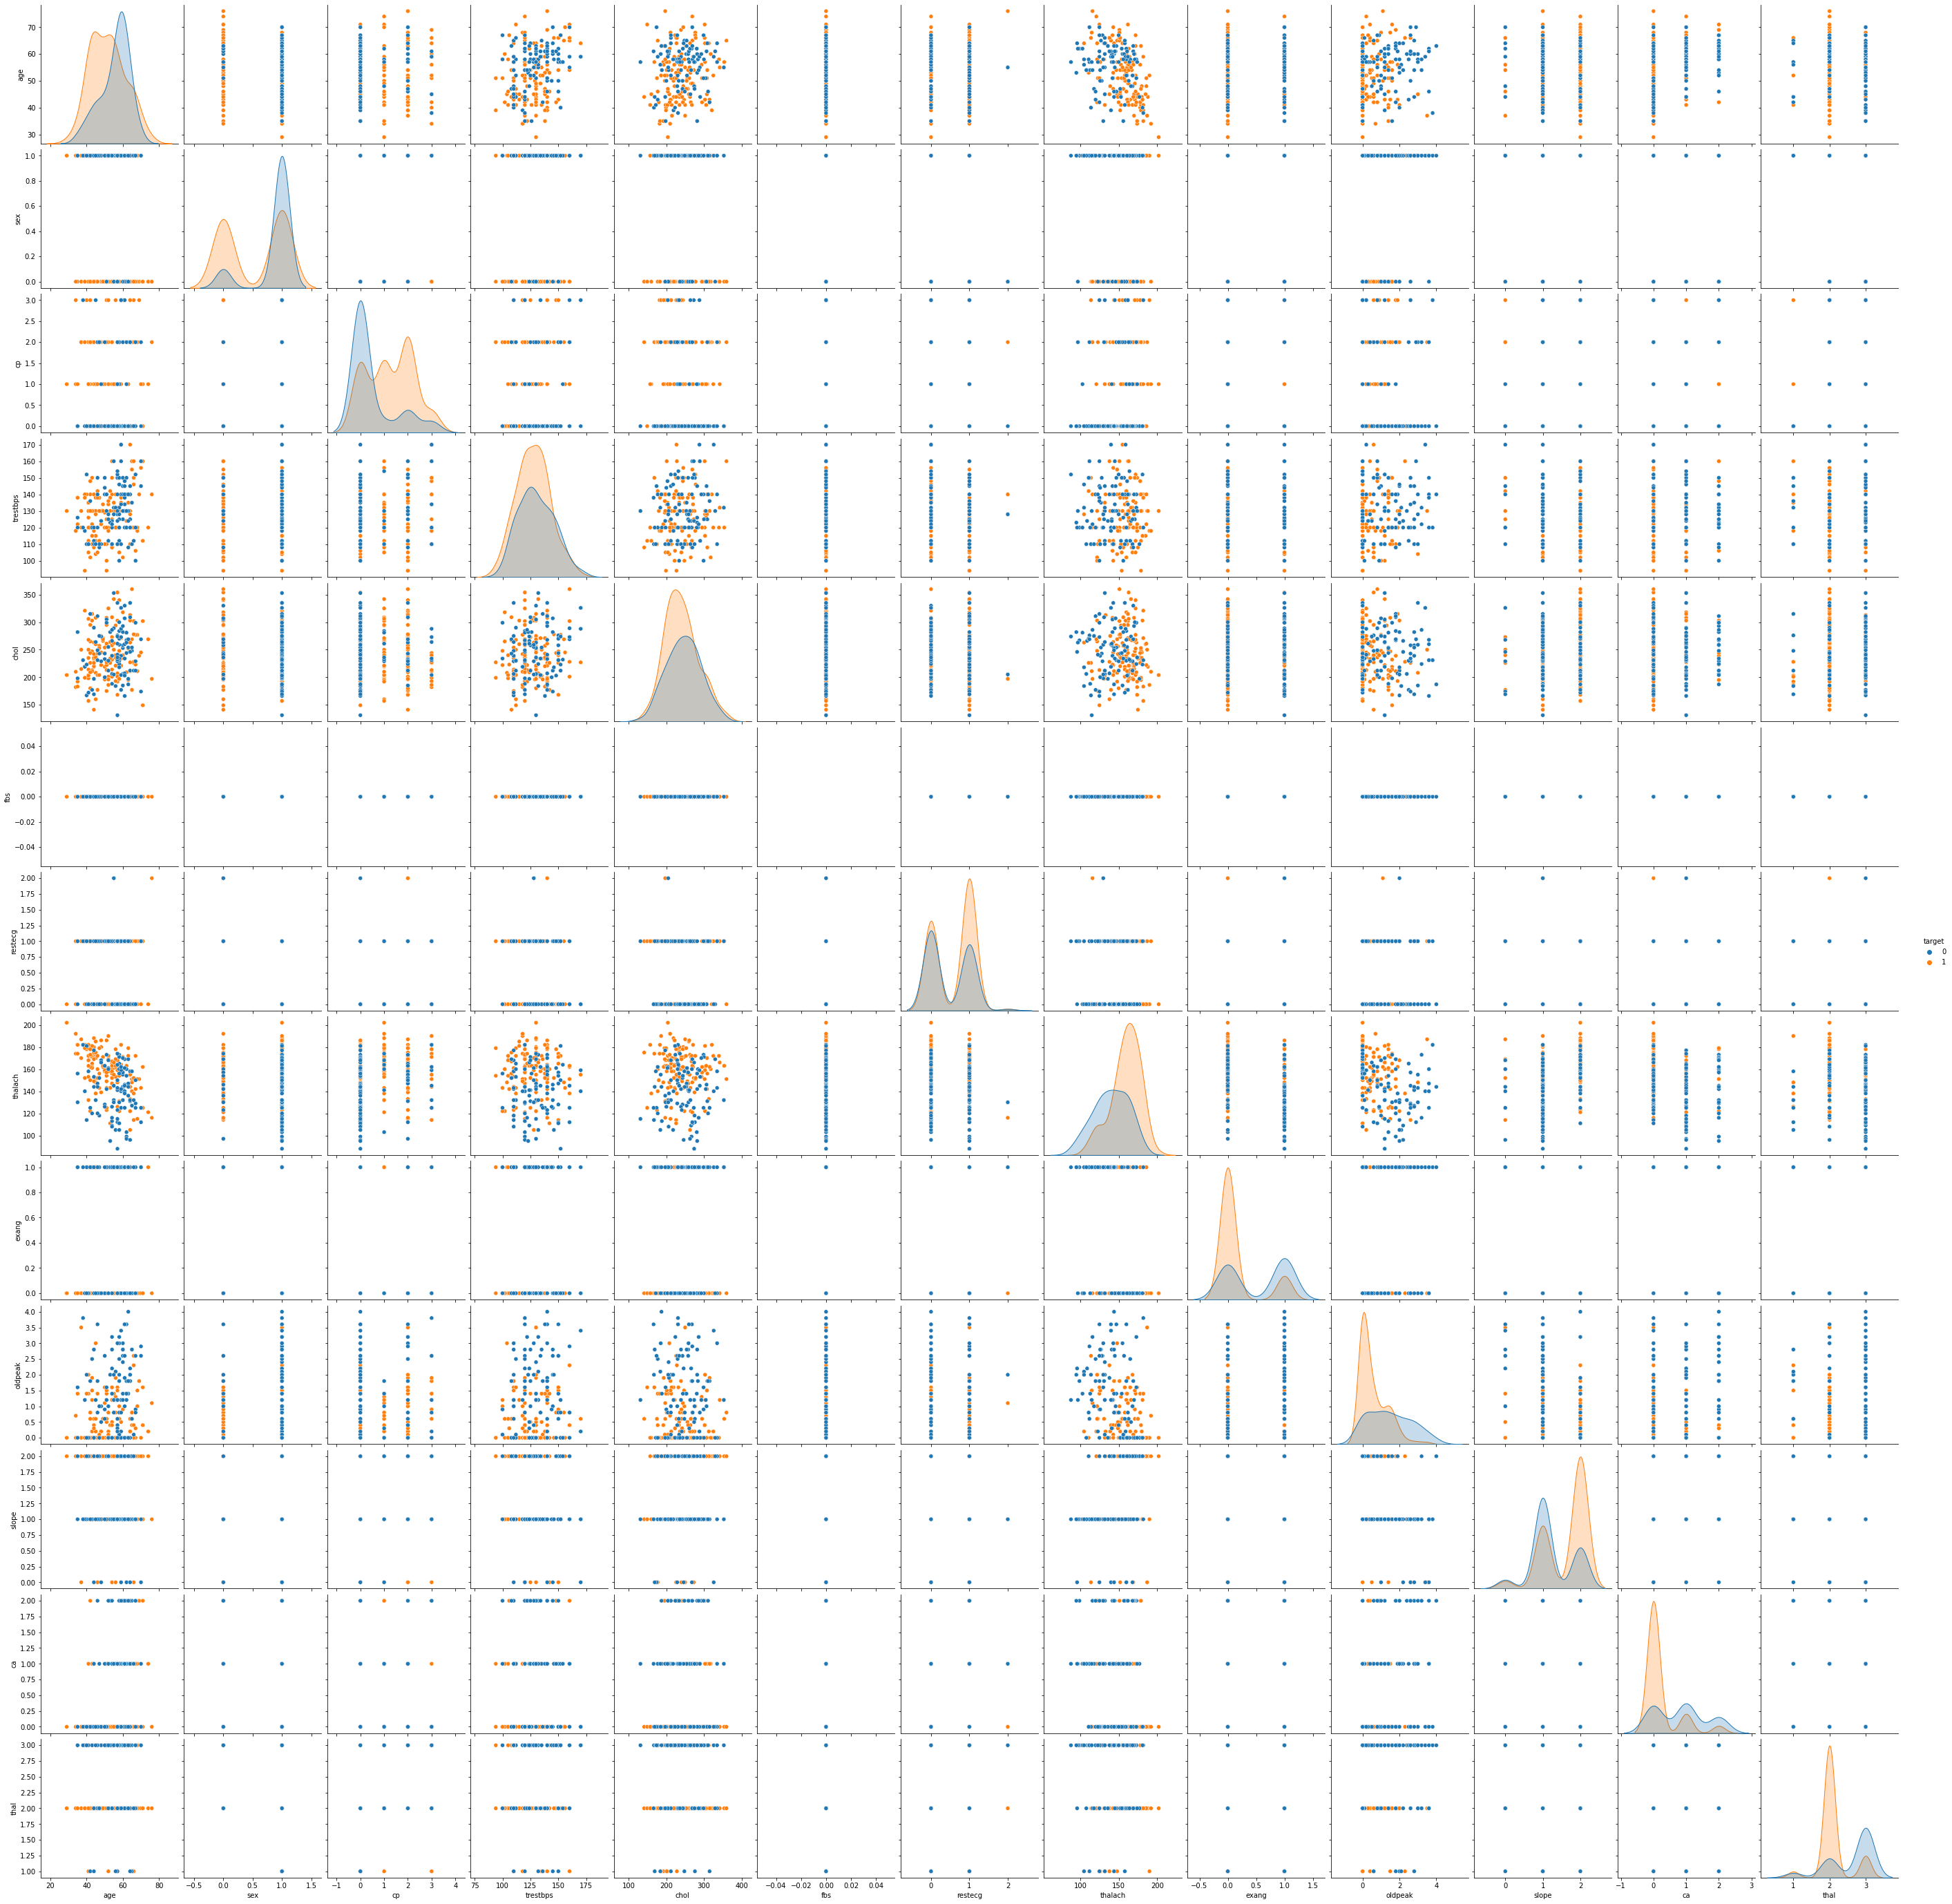

In [ ]:
sns.pairplot(df , hue="target", height=3, aspect=1);

In [ ]:
# Checking the distribution of Target/Output Variable
# 0 for no presence
# 1 otherwise
dataset['target'].value_counts()

1    132
0     96
Name: target, dtype: int64

###Splitting the Features and Target of the dataset

In [ ]:
X = dataset.drop(columns='target', axis=1)
print(X)

          age  trestbps      chol   thalach   oldpeak  sex_0  sex_1  cp_0  \
1   -1.773674  0.086772  0.172434  1.600895  2.472003      0      1     0   
2   -1.339305  0.086772 -0.867525  0.932553  0.439382      1      0     0   
3    0.289579 -0.566164 -0.144075  1.199890 -0.141366      0      1     0   
4    0.398172 -0.566164  2.523646  0.531547 -0.334949      1      0     1   
5    0.398172  0.739707 -1.138819 -0.136795 -0.528532      0      1     1   
..        ...       ...       ...       ...       ...    ...    ...   ...   
296  1.049726 -0.304990 -1.025780 -0.671469 -0.915698      1      0     1   
298  0.398172  0.739707 -0.031036 -1.250699 -0.722115      1      0     1   
299 -0.904936 -1.219100  0.488943 -0.849694  0.245799      0      1     0   
301  0.398172  0.086772 -2.517895 -1.607149  0.245799      0      1     1   
302  0.398172  0.086772 -0.144075  1.021665 -0.915698      1      0     0   

     cp_1  cp_2  ...  exang_1  slope_0  slope_1  slope_2  ca_0  ca_1  ca_2 

In [ ]:
Y = dataset['target']
print(Y)

1      1
2      1
3      1
4      1
5      1
      ..
296    0
298    0
299    0
301    0
302    0
Name: target, Length: 228, dtype: int64


###Splitting the Data into Training data & Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 5)  

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

###K- Nearest Neighbor Classifier

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, Y_train)
score=cross_val_score(knn_classifier,X_train,Y_train,cv=10)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(Y_test, y_pred_knn)

0.9130434782608695

In [ ]:
score.mean()

0.8014619883040934

In [ ]:
knn_classifier  = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
metric_params=None, n_jobs=1, n_neighbors=5, p=1,
weights='uniform')
knn_classifier.fit(X_train, Y_train)
score=cross_val_score(knn_classifier,X_train,Y_train,cv=10)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(Y_test, y_pred_knn)

0.9782608695652174

In [ ]:
score=cross_val_score(knn_classifier,X_train,Y_train,cv=10)
score.mean()

0.8289473684210528

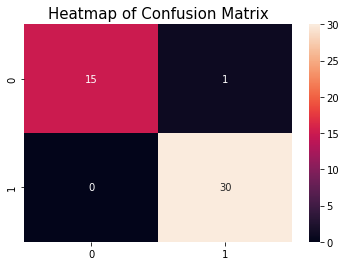

In [ ]:
#confustion matrix
cm = confusion_matrix(Y_test, y_pred_knn)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
print(classification_report(Y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.97      1.00      0.98        30

    accuracy                           0.98        46
   macro avg       0.98      0.97      0.98        46
weighted avg       0.98      0.98      0.98        46



###Saving model

In [ ]:
## Pickle
import pickle

# save model
pickle.dump(knn_classifier, open('model.pkl', 'wb'))

# load model
Heart_disease_detector_model = pickle.load(open('model.pkl', 'rb'))

# predict the output
y_pred = Heart_disease_detector_model.predict(X_test)

# confusion matrix
print('Confusion matrix: \n',confusion_matrix(Y_test, y_pred),'\n')

# show the accuracy
print('Accuracy of model = ',accuracy_score(Y_test, y_pred))

Confusion matrix: 
 [[15  1]
 [ 0 30]] 

Accuracy of model =  0.9782608695652174


###Test


In [ ]:
input_data = (63,145,233,150,2.3,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = Heart_disease_detector_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Patient does not have a risk of Heart Disease')
else:
  print('The Person has Heart Disease, Please visit the nearest hospital!!!')

[1]
The Person has Heart Disease, Please visit the nearest hospital!!!


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
